In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import decks

In [14]:
df = pd.read_csv("convos.csv", index_col=0)
df = df[["Utterance", "Emotion"]]
df.head()

,Utterance,Emotion
Sr No.,,
1,"Oh my God, he’s lost it. He’s totally lost it.",sadness
2,What?,surprise
3,"Or! Or, we could go to the bank, close our acc...",neutral
4,You’re a genius!,joy
5,"Aww, man, now we won’t be bank buddies!",sadness


In [15]:
set(df["Emotion"])

{'anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise'}

In [16]:
emotions = ["anger", "fear", "joy", "love", "sadness", "surprise"]

In [17]:
net = decks.DecksNet(0.2)

Using 67:40 for hidden layers


In [18]:
convo_1 = [  # alpha=0.2 works well here.
    "I'm really excited to see you!",
    "Get lost.",
    "Hey, what the hell?!",
    "I know what you said about my sister.",
    "Hey man, I was joking!",
    "I don't care. It really hurt her.",
    "Well, screw you then.",
]

np.round(net.emotion(np.array(convo_1)), 3)

array([[0.073, 0.004, 0.859, 0.005, 0.058, 0.001],
       [0.269, 0.097, 0.062, 0.003, 0.549, 0.019],
       [0.142, 0.418, 0.318, 0.008, 0.096, 0.018],
       [0.299, 0.097, 0.284, 0.011, 0.302, 0.007],
       [0.241, 0.072, 0.573, 0.004, 0.107, 0.003],
       [0.024, 0.018, 0.05 , 0.001, 0.906, 0.001],
       [0.344, 0.184, 0.319, 0.01 , 0.141, 0.002]], dtype=float32)

In [19]:
preds = np.round(net.predict(convo_1), 3)
preds

Tensor("decks_net_1/sequential_1/dense_3/Softmax:0", shape=(None, 6), dtype=float32)
1/1 [==============================] - 2s 2s/step


array([[0.433, 0.267, 0.895, 0.746, 0.1  , 0.839],
       [0.543, 0.392, 0.76 , 0.713, 0.232, 0.818],
       [0.595, 0.452, 0.704, 0.665, 0.28 , 0.791],
       [0.635, 0.499, 0.652, 0.63 , 0.328, 0.749],
       [0.634, 0.493, 0.66 , 0.631, 0.318, 0.753],
       [0.67 , 0.577, 0.546, 0.57 , 0.441, 0.655],
       [0.693, 0.594, 0.538, 0.551, 0.44 , 0.649]])

In [20]:
import random

MAX = len(df) - 10
# idx = random.randint(0, MAX)
idx = 774
convo = df.loc[idx:idx + 9]
convo

# 774, 16, 436, 906, 388, 39

,Utterance,Emotion
Sr No.,,
774,Here!,anger
775,"Andy Cooper, he teaches guitar and look ooh, t...",neutral
776,Fine! You go learn from your qualified instruc...,anger
777,"""Baddest man in the whole damn town.""",neutral
778,"Oh, fine! Take his side!",anger
779,"And shame on you! You should know better, Joey...",anger
780,Hey!,anger
781,No! Ah-ah-ah-ah-ah! You can have this back whe...,anger
782,Hi!,joy


In [21]:
arr = np.round(net.emotion(np.array(convo_1)), 3)

for i in range(len(arr)):
    argmax = np.argmax(arr[i])
    print(emotions[argmax], arr[i][argmax])

joy 0.859
sadness 0.549
fear 0.418
sadness 0.302
joy 0.573
sadness 0.906
anger 0.344


In [22]:
preds = net.predict(convo_1)
np.round(preds, 3)

1/1 [==============================] - 0s 34ms/step


array([[0.433, 0.267, 0.895, 0.746, 0.1  , 0.839],
       [0.543, 0.392, 0.76 , 0.713, 0.232, 0.818],
       [0.595, 0.452, 0.704, 0.665, 0.28 , 0.791],
       [0.635, 0.499, 0.652, 0.63 , 0.328, 0.749],
       [0.634, 0.493, 0.66 , 0.631, 0.318, 0.753],
       [0.67 , 0.577, 0.546, 0.57 , 0.441, 0.655],
       [0.693, 0.594, 0.538, 0.551, 0.44 , 0.649]])

In [23]:
# ["anger", "fear", "joy", "love", "sadness", "surprise"]
np.argmax(preds, axis=1)

array([2, 5, 5, 5, 5, 0, 0])

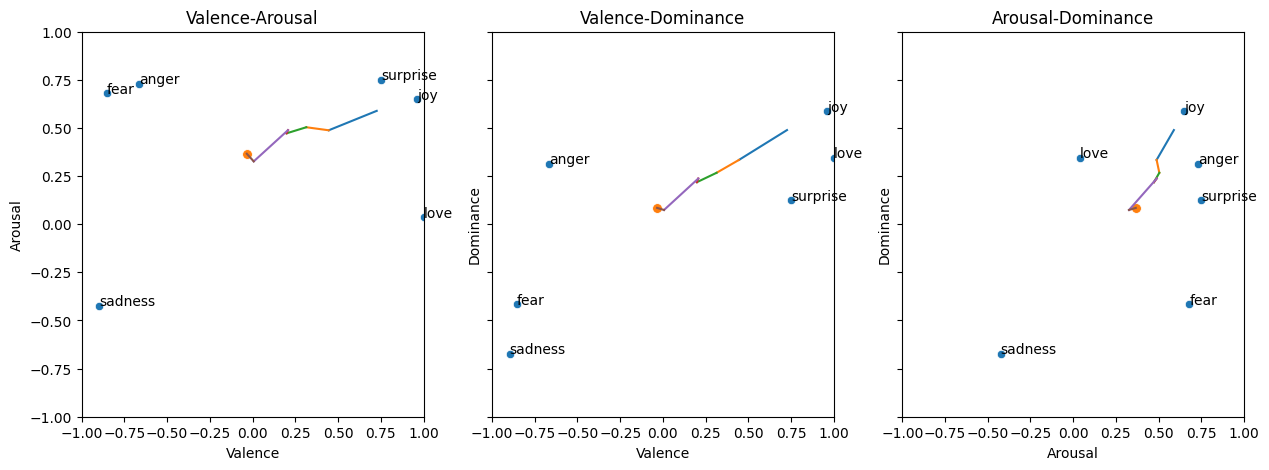

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
axes[0].set_xlim(-1, 1)
axes[0].set_ylim(-1, 1)

dims = {
    "Valence-Arousal": (0, 1),
    "Valence-Dominance": (0, 2),
    "Arousal-Dominance": (1, 2),
}

for i, (k, v) in enumerate(dims.items()):
    axes[i].set_title(k)
    axes[i].set_xlabel(k.split("-")[0])
    axes[i].set_ylabel(k.split("-")[1])

    sns.scatterplot(ax=axes[i], x=net.context.points[:, v[0]], y=net.context.points[:, v[1]])
    for j, text in enumerate(emotions):
        axes[i].annotate(text, (net.context.points[j, v[0]], net.context.points[j, v[1]]))

    for j in range(1, len(net.context.path)):
        sns.lineplot(ax=axes[i], x=net.context.path[j-1:j+1, v[0]], y=net.context.path[j-1:j+1, v[1]])
    sns.scatterplot(ax=axes[i], x=[net.context.path[-1, v[0]]], y=[net.context.path[-1, v[1]]], s=50)